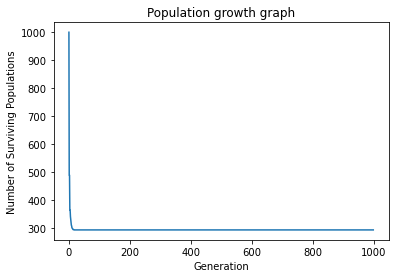

[2.97666579e+02 2.89258633e-05]
Line of best fit equation for population growth graph
Y = 297.6665793617041 * e^(-2.8925863289041312e-05 * x)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize

# Number of poulations needed
n_populations  = 1000

# Create 1000 replicate population of one individual
populations  = np.ones(n_populations)

# Number of generations simulated 
n_generations = 1000

# Lists to store data 
surviving_populations  = []
average_populations = []
total_populations = []



# Simulation process for i generations 
for i in range(n_generations):
    extinct = populations <= 0
    surviving_populations.append(len(populations[~extinct]))
    average_populations.append(np.mean(populations[~extinct]))
    total_populations.append(np.sum(populations[~extinct]))
    
    for j in range(n_populations):
        e = np.random.rand()
        if e < 0.5:
            populations[j] = populations[j]-1     
            
        if e > 0.5:
            populations[j] = populations[j] * 2
            
 
# Plot the results 

# Population Growth Graph

plt.plot(range(n_generations), surviving_populations)
plt.title("Population growth graph")
plt.xlabel("Generation")
plt.ylabel("Number of Surviving Populations")
plt.show()

f = range(n_generations)

def monoExp(x, m, t):
    return m * np.exp(-t * x)


p0 = (1000, 0)
params, cv = scipy.optimize.curve_fit(monoExp, range(n_generations), surviving_populations, p0)
m, t = params

print(params)

print("Line of best fit equation for population growth graph")
print(f"Y = {m} * e^(-{t} * x)")